In [21]:
!pip install nptdms

In [22]:
from nptdms import TdmsFile
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import numpy as np

multipliers = {
    'p': 1e-12,
    'n': 1e-9,
    'u': 1e-6,
    'm': 1e-3,
    'k': 1e3,
    'M': 1e6,
    'G': 1e9,
    '':1
}

def TDMS_File(file_path):
    tdms_file = TdmsFile.read(file_path)

    Groups_DataFrame = []

    for group in tdms_file.groups():
        
        Groups_DataFrame.append(tdms_file[group.name].as_dataframe())
        print(group.name)
    
    return Groups_DataFrame

def convert(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.')
        for sufijo, mult in multipliers.items():
            if valor.endswith(sufijo):
                try:
                    return float(valor.replace(sufijo, '')) * mult
                except:
                    return None
    return valor

def Excel_File(file_path):
    df = pd.read_excel(file_path)
    for col in df.columns:
        df[col] = df[col].map(convert)
    return df

COHERENTE

In [4]:
LASER_G2_2US = Excel_File("LASER_G2_2US.xlsx")
LASER_RATES = Excel_File("LASER_RATES.xlsx")
LASER_SSH = Excel_File("LASER_SSH.xlsx")

In [438]:
LASER_G2_2US

,tau (s) - HBT Measurement,g^(2)(tau) - HBT Measurement,tau (s) - none Fit,g^(2)(tau) - none Fit
0,-9.998240e-07,1.024950,-9.998240e-07,1
1,-9.996470e-07,0.975228,-9.996470e-07,1
2,-9.994710e-07,1.008380,-9.994710e-07,1
3,-9.992950e-07,0.971957,-9.992950e-07,1
4,-9.991180e-07,1.010560,-9.991180e-07,1
...,...,...,...,...
11332,9.987650e-07,0.998344,9.987650e-07,1
11333,9.989420e-07,0.998780,9.989420e-07,1
11334,9.991180e-07,1.008590,9.991180e-07,1
11335,9.992950e-07,0.992456,9.992950e-07,1


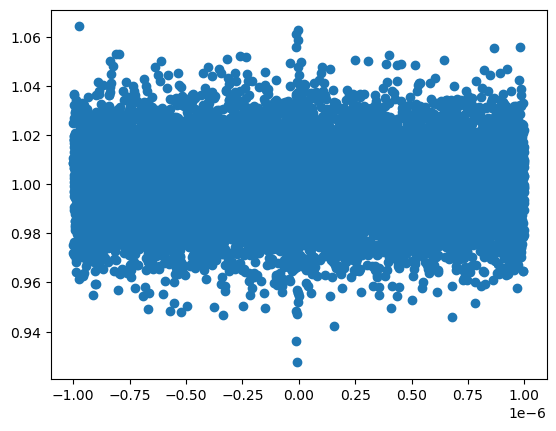

In [35]:
plt.scatter(LASER_G2_2US["tau (s) - HBT Measurement"], LASER_G2_2US["g^(2)(tau) - HBT Measurement"])

In [76]:
#Esta parte es con el fpga

Datos_laser1 = TDMS_File("Laser_FPGA_100ms.tdms")[0]
Datos_laser2 = TDMS_File("Laser_FPGA_100ms_2.tdms")[0]
CanalA_laser, CanalB_laser, _, CoinAB_laser, _, _, _ = TDMS_File("Laser_FPGA_100ms_cortos.tdms")

Datos
Datos
Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [80]:
#tau_coin para largos

taus_largos = Datos_laser1.mean().iloc[2:].to_numpy() / (channels[0]*channels[1])
taus_largos

array([1.94839379e-07, 1.77558084e-07, 1.30217711e-07, 1.57733907e-07,
       2.31077421e-07, 1.17245847e-07, 1.20212542e-07, 1.59417278e-07,
       2.16616268e-07, 1.15970446e-07, 6.22213781e-08, 1.63017713e-07,
       2.37593059e-07, 1.27658986e-07, 1.69196678e-07, 1.36570954e-07,
       1.80302970e-07, 2.51392746e-07, 1.36265967e-07, 1.45364096e-07,
       1.28158057e-07])

In [82]:
#tau_coin para cortos
taus_cortos = CoinAB_laser.mean() / (CanalA_laser.mean() *CanalB_laser.mean())
taus_cortos = taus_cortos.to_numpy()
taus_cortos

array([5.55205281e-08, 5.33833752e-08, 5.49327973e-08, 5.35220677e-08,
       5.54474004e-08, 5.62332018e-08, 5.66572278e-08, 5.28229546e-08,
       5.50873999e-08, 5.10718855e-08, 5.65997308e-08, 5.25290783e-08,
       5.44132546e-08, 5.70171551e-08, 5.26132157e-08, 5.50488176e-08,
       5.35637734e-08, 5.39233494e-08, 5.62058377e-08, 5.25853264e-08])

SPDC

In [85]:
SPDC_G2 = Excel_File("SPDC_G2.xlsx")
SPDC_RATES = Excel_File("SPDC_RATES.xlsx")
SPDC_SSH = Excel_File("SPDC_SSH.xlsx")

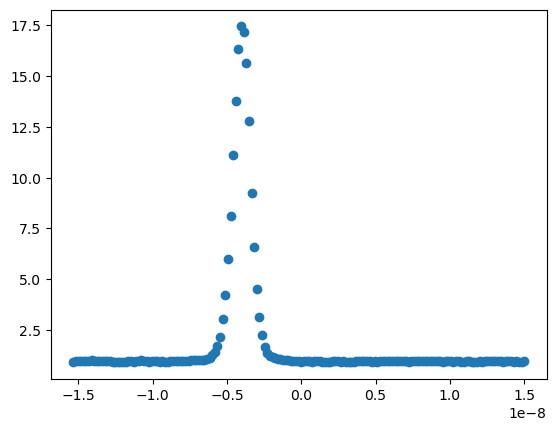

In [87]:
plt.scatter(SPDC_G2["tau (s) - HBT Measurement"], SPDC_G2["g^(2)(tau) - HBT Measurement"])

PSEUDOTÉRMICA

In [142]:
CanalA, CanalB, CanalC, CoinAB, CoinAC, CoinBC, CoinABC = TDMS_File("termica_FPGA_100ms_cortos_3.25V.tdms")

Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [158]:
taus = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])*10

In [160]:
g2_term_cortos = CoinAB.mean().to_numpy() / (CanalA.mean().to_numpy()* CanalB.mean().to_numpy() *  taus_cortos)

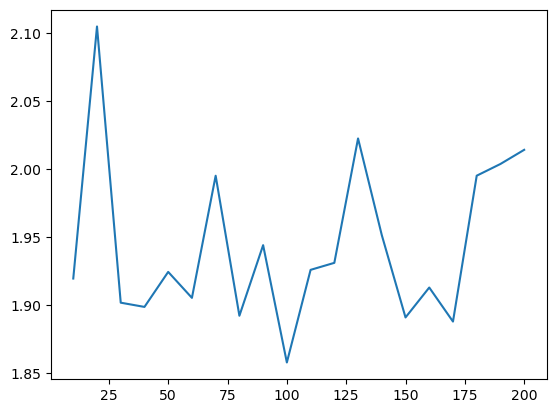

In [162]:
plt.plot(taus, g2_term_cortos)

In [390]:
Datos1 = TDMS_File("termica_FPGA_100ms_largos_3.25V_2.tdms")[0]

Datos


In [392]:
taus_term = np.arange(-10, 11, 1)*10

coin1 = Datos1.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA1 = Datos1["Canal A"].to_numpy()
channelB1 = Datos1["Canal B"].to_numpy()

g2_term1 = []

for i in range(len(coin1)):
    g2_term1.append(coin1[i]/(taus_largos*channelA1[i]*channelB1[i]))

g2_term1 = np.array(g2_term1)
g2_term1_mean = g2_term1.mean(axis=0)
g2_term1_std = g2_term1.std(axis=0)

In [394]:
Datos2 = TDMS_File("termica_FPGA_100ms_largos_0.75V.tdms")[0]

Datos


In [396]:
coin2 = Datos2.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA2 = Datos2["Canal A"].to_numpy()
channelB2 = Datos2["Canal B"].to_numpy()

g2_term2 = []

for i in range(len(coin2)):
    g2_term2.append(coin2[i]/(taus_largos*channelA2[i]*channelB2[i]))

taus_term
g2_term2 = np.array(g2_term2)
g2_term2_mean = g2_term2.mean(axis=0)
g2_term2_std = g2_term2.std(axis=0)

In [398]:
Datos3 = TDMS_File("termica_FPGA_100ms_largos_1V.tdms")[0]

Datos


In [400]:
coin3 = Datos3.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA3 = Datos3["Canal A"].to_numpy()
channelB3 = Datos3["Canal B"].to_numpy()

g2_term3 = []

for i in range(len(coin3)):
    g2_term3.append(coin3[i]/(taus_largos*channelA3[i]*channelB3[i]))

g2_term3 = np.array(g2_term3)
g2_term3_mean = g2_term3.mean(axis=0)
g2_term3_std = g2_term3.std(axis=0)

In [402]:
Datos4 = TDMS_File("termica_FPGA_100ms_largos_5V.tdms")[0]

Datos


In [404]:
coin4 = Datos4.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA4 = Datos4["Canal A"].to_numpy()
channelB4 = Datos4["Canal B"].to_numpy()

g2_term4 = []

for i in range(len(coin4)):
    g2_term4.append(coin4[i]/(taus_largos*channelA4[i]*channelB4[i]))

g2_term4 = np.array(g2_term4)
g2_term4_mean = g2_term4.mean(axis=0)
g2_term4_std = g2_term4.std(axis=0)

In [406]:
Datos5 = TDMS_File("termica_FPGA_100ms_largos_10V.tdms")[0]

Datos


In [408]:
coin5 = Datos5.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA5 = Datos5["Canal A"].to_numpy()
channelB5 = Datos5["Canal B"].to_numpy()

g2_term5 = []

for i in range(len(coin5)):
    g2_term5.append(coin5[i]/(taus_largos*channelA5[i]*channelB5[i]))

g2_term5 = np.array(g2_term5)
g2_term5_mean = g2_term5.mean(axis=0)
g2_term5_std = g2_term5.std(axis=0)

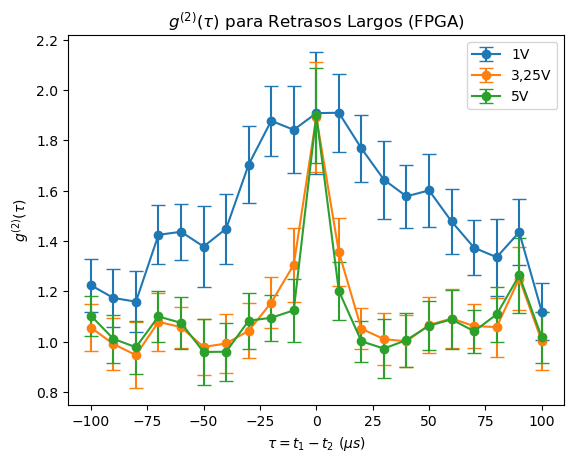

In [468]:
plt.title(r"$g^{(2)}(\tau)$ para Retrasos Largos (FPGA)")
#plt.errorbar(taus_term, g2_term2_mean, label="0,75V",marker='o',yerr=g2_term2_std,capsize=5)
plt.errorbar(taus_term, g2_term3_mean, label="1V",marker='o',yerr=g2_term3_std,capsize=5)
plt.errorbar(taus_term, g2_term1_mean, label="3,25V",marker='o',yerr=g2_term1_std,capsize=5)
plt.errorbar(taus_term, g2_term4_mean, label="5V",marker='o',yerr=g2_term4_std,capsize=5)
#plt.errorbar(taus_term, g2_term5_mean, label="10V",marker='o',yerr=g2_term5_std,capsize=5)
plt.xlabel(r"$\tau = t_1 - t_2\ (\mu s)$")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.legend()